## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.879536 -1.674838 -0.110259 -1.758936 -0.597630 -2.675820
1  0.082286 -1.200053  1.350219  0.352708  0.228985 -0.099848
2  1.718790  1.343881  1.149588 -0.072200 -0.701813 -0.095591
3 -1.315679 -1.033555 -0.986731 -0.066123 -1.676598 -1.541990
4 -1.451967  0.874756  1.535561 -0.931609  1.433785 -0.630285


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9694499	total: 57.3ms	remaining: 57.3s
1:	learn: 0.9596153	total: 57.8ms	remaining: 28.8s
2:	learn: 0.9482852	total: 58.4ms	remaining: 19.4s
3:	learn: 0.9382980	total: 58.9ms	remaining: 14.7s
4:	learn: 0.9305948	total: 59.4ms	remaining: 11.8s
5:	learn: 0.9218085	total: 59.9ms	remaining: 9.92s
6:	learn: 0.9133005	total: 60.3ms	remaining: 8.56s
7:	learn: 0.9058135	total: 61.2ms	remaining: 7.58s
8:	learn: 0.8971314	total: 61.8ms	remaining: 6.8s
9:	learn: 0.8886960	total: 62.4ms	remaining: 6.17s
10:	learn: 0.8808049	total: 63ms	remaining: 5.66s
11:	learn: 0.8722595	total: 63.4ms	remaining: 5.22s
12:	learn: 0.8633813	total: 64.2ms	remaining: 4.87s
13:	learn: 0.8549297	total: 64.8ms	remaining: 4.57s
14:	learn: 0.8466174	total: 65.3ms	remaining: 4.29s
15:	learn: 0.8391993	total: 65.8ms	remaining: 4.04s
16:	learn: 0.8316805	total: 66.3ms	remaining: 3.83s
17:	learn: 0.8241222	total: 66.7ms	remaining: 3.64s
18:	learn: 0.8175884	total: 67.2ms	remaining: 3

102:	learn: 0.4110814	total: 109ms	remaining: 947ms
103:	learn: 0.4074664	total: 109ms	remaining: 942ms
104:	learn: 0.4044500	total: 110ms	remaining: 936ms
105:	learn: 0.4020430	total: 110ms	remaining: 929ms
106:	learn: 0.3988225	total: 111ms	remaining: 923ms
107:	learn: 0.3965173	total: 111ms	remaining: 917ms
108:	learn: 0.3935180	total: 112ms	remaining: 912ms
109:	learn: 0.3908603	total: 112ms	remaining: 906ms
110:	learn: 0.3880823	total: 112ms	remaining: 900ms
111:	learn: 0.3849314	total: 113ms	remaining: 894ms
112:	learn: 0.3820798	total: 113ms	remaining: 889ms
113:	learn: 0.3794128	total: 114ms	remaining: 882ms
114:	learn: 0.3766150	total: 114ms	remaining: 877ms
115:	learn: 0.3740833	total: 115ms	remaining: 873ms
116:	learn: 0.3712977	total: 115ms	remaining: 867ms
117:	learn: 0.3689287	total: 115ms	remaining: 863ms
118:	learn: 0.3663735	total: 116ms	remaining: 859ms
119:	learn: 0.3634422	total: 117ms	remaining: 854ms
120:	learn: 0.3616593	total: 117ms	remaining: 849ms
121:	learn: 

271:	learn: 0.1429233	total: 187ms	remaining: 500ms
272:	learn: 0.1421545	total: 187ms	remaining: 499ms
273:	learn: 0.1415355	total: 188ms	remaining: 498ms
274:	learn: 0.1407679	total: 188ms	remaining: 496ms
275:	learn: 0.1400398	total: 189ms	remaining: 495ms
276:	learn: 0.1393235	total: 189ms	remaining: 493ms
277:	learn: 0.1386141	total: 189ms	remaining: 492ms
278:	learn: 0.1375471	total: 190ms	remaining: 491ms
279:	learn: 0.1369465	total: 190ms	remaining: 489ms
280:	learn: 0.1362411	total: 191ms	remaining: 488ms
281:	learn: 0.1355559	total: 191ms	remaining: 487ms
282:	learn: 0.1349258	total: 192ms	remaining: 486ms
283:	learn: 0.1342252	total: 192ms	remaining: 485ms
284:	learn: 0.1335621	total: 193ms	remaining: 484ms
285:	learn: 0.1327411	total: 193ms	remaining: 482ms
286:	learn: 0.1320435	total: 194ms	remaining: 481ms
287:	learn: 0.1313247	total: 194ms	remaining: 479ms
288:	learn: 0.1307112	total: 195ms	remaining: 479ms
289:	learn: 0.1298787	total: 195ms	remaining: 477ms
290:	learn: 

487:	learn: 0.0505253	total: 292ms	remaining: 306ms
488:	learn: 0.0502563	total: 292ms	remaining: 306ms
489:	learn: 0.0501076	total: 293ms	remaining: 305ms
490:	learn: 0.0498432	total: 293ms	remaining: 304ms
491:	learn: 0.0495862	total: 294ms	remaining: 303ms
492:	learn: 0.0493566	total: 294ms	remaining: 302ms
493:	learn: 0.0490983	total: 295ms	remaining: 302ms
494:	learn: 0.0489917	total: 295ms	remaining: 301ms
495:	learn: 0.0487425	total: 296ms	remaining: 300ms
496:	learn: 0.0485222	total: 296ms	remaining: 300ms
497:	learn: 0.0482570	total: 297ms	remaining: 299ms
498:	learn: 0.0480089	total: 297ms	remaining: 298ms
499:	learn: 0.0477494	total: 298ms	remaining: 298ms
500:	learn: 0.0476114	total: 298ms	remaining: 297ms
501:	learn: 0.0473657	total: 299ms	remaining: 296ms
502:	learn: 0.0471570	total: 299ms	remaining: 296ms
503:	learn: 0.0469472	total: 300ms	remaining: 295ms
504:	learn: 0.0467096	total: 300ms	remaining: 294ms
505:	learn: 0.0464812	total: 301ms	remaining: 293ms
506:	learn: 

646:	learn: 0.0251366	total: 369ms	remaining: 202ms
647:	learn: 0.0249961	total: 370ms	remaining: 201ms
648:	learn: 0.0248429	total: 371ms	remaining: 200ms
649:	learn: 0.0247262	total: 371ms	remaining: 200ms
650:	learn: 0.0246186	total: 372ms	remaining: 199ms
651:	learn: 0.0244828	total: 372ms	remaining: 199ms
652:	learn: 0.0243780	total: 372ms	remaining: 198ms
653:	learn: 0.0242588	total: 373ms	remaining: 197ms
654:	learn: 0.0241215	total: 373ms	remaining: 197ms
655:	learn: 0.0240463	total: 374ms	remaining: 196ms
656:	learn: 0.0239149	total: 374ms	remaining: 195ms
657:	learn: 0.0238707	total: 375ms	remaining: 195ms
658:	learn: 0.0237713	total: 375ms	remaining: 194ms
659:	learn: 0.0236260	total: 376ms	remaining: 194ms
660:	learn: 0.0234992	total: 376ms	remaining: 193ms
661:	learn: 0.0233688	total: 377ms	remaining: 192ms
662:	learn: 0.0232380	total: 377ms	remaining: 192ms
663:	learn: 0.0231014	total: 378ms	remaining: 191ms
664:	learn: 0.0229940	total: 379ms	remaining: 191ms
665:	learn: 

871:	learn: 0.0111471	total: 475ms	remaining: 69.7ms
872:	learn: 0.0110808	total: 475ms	remaining: 69.1ms
873:	learn: 0.0110690	total: 476ms	remaining: 68.6ms
874:	learn: 0.0110153	total: 476ms	remaining: 68ms
875:	learn: 0.0110070	total: 476ms	remaining: 67.4ms
876:	learn: 0.0109954	total: 477ms	remaining: 66.9ms
877:	learn: 0.0109839	total: 477ms	remaining: 66.3ms
878:	learn: 0.0109336	total: 478ms	remaining: 65.8ms
879:	learn: 0.0109255	total: 478ms	remaining: 65.2ms
880:	learn: 0.0108617	total: 478ms	remaining: 64.6ms
881:	learn: 0.0108504	total: 479ms	remaining: 64.1ms
882:	learn: 0.0108392	total: 479ms	remaining: 63.5ms
883:	learn: 0.0108314	total: 480ms	remaining: 62.9ms
884:	learn: 0.0107797	total: 480ms	remaining: 62.4ms
885:	learn: 0.0107687	total: 480ms	remaining: 61.8ms
886:	learn: 0.0107578	total: 481ms	remaining: 61.3ms
887:	learn: 0.0107038	total: 481ms	remaining: 60.7ms
888:	learn: 0.0106422	total: 482ms	remaining: 60.2ms
889:	learn: 0.0106315	total: 482ms	remaining: 59

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

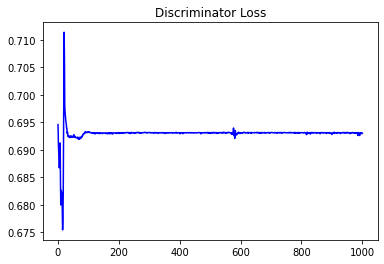

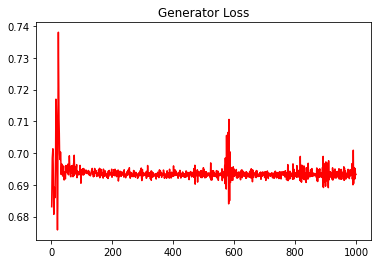

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.14108261673302883


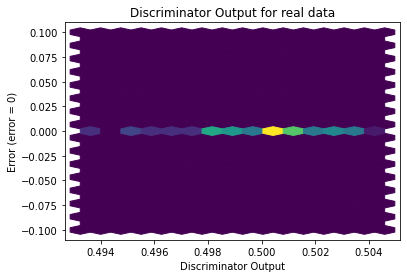

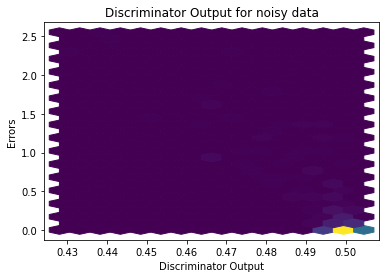

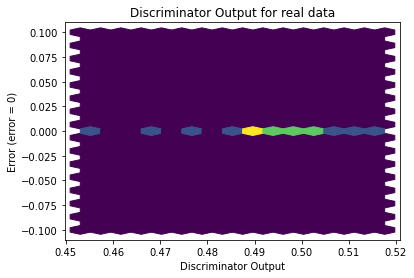

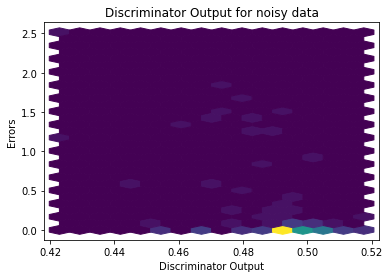

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


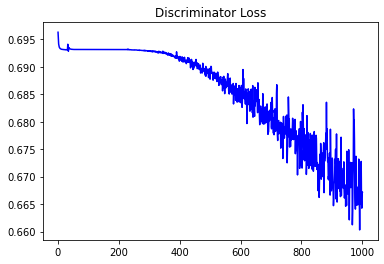

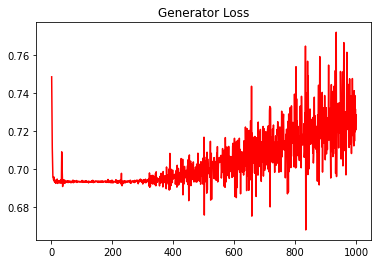

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.15151393568104027


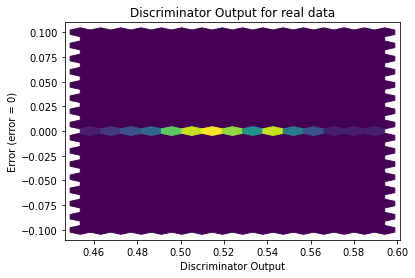

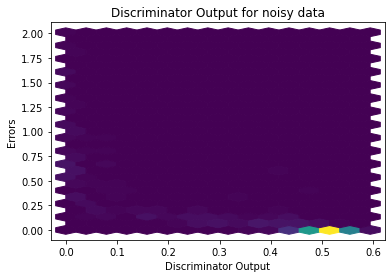

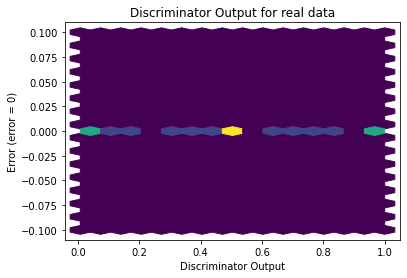

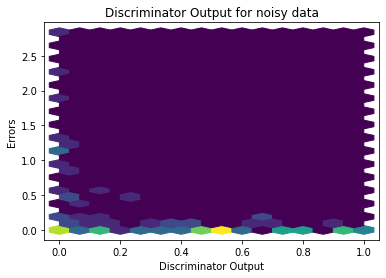

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
